In [21]:
from keras.preprocessing.image import ImageDataGenerator
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

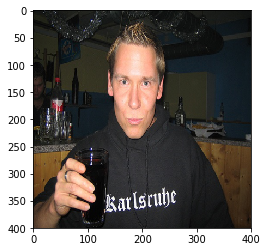

In [114]:
train_datagen = ImageDataGenerator(
        #rescale=1./255,
        )

images = glob.glob('../datasets/HUMANS/train/jpge/*')[0:10]
images2 = glob.glob('../datasets/HUMANS/train/segmented/*')[0:10]

X = np.zeros(shape=(len(images), 400, 400, 3))  
Y = np.zeros(shape=(len(images), 400, 400, 1))  

for i, image in enumerate(images):
    im = cv2.imread(image)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im = cv2.resize(im, (400, 400)) 
    
    if(i == 5):
        plt.imshow(im)
        plt.show()
        
    X[i] = im
    

for i, image in enumerate(images2):
    im = cv2.imread(image, 0)
    im = cv2.resize(im, (400, 400))
    im = np.expand_dims(im, axis=2)
    Y[i] = im
    
train_generator = train_datagen.flow(
        X,
        batch_size=32,
        shuffle=False,
        seed=42)

label_generator = train_datagen.flow(
        Y,
        batch_size=32,
        shuffle=False,
        seed=42)


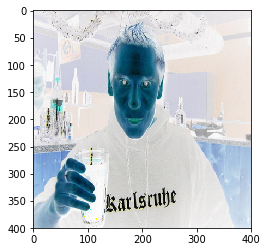

In [117]:
plt.imshow(X[5])
plt.show()

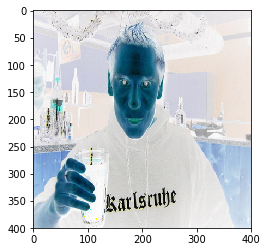

In [105]:
for i in train_generator:
    plt.imshow(i[5])
    plt.show()
    break

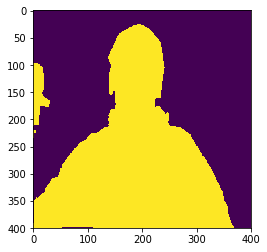

In [106]:
for i in label_generator:
    plt.imshow(i[5][:,:,0] * 255)
    plt.show()
    break